# Mental Health Treatment System for people

# To predict whether a patient should be treated for his/her mental illness or not

In [1]:
# To Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
#To load the dataset
df = pd.read_csv("C:\\Users\\jaanu\\Downloads\\archive\\survey.csv")
df

Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often            6-25  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely            6-25  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No         Don't know              No      NaN  
1255    

In [3]:
# dataframe information
df.info() 
# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
df.describe()# The describe() method returns description of the data in the DataFrame

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

In [5]:
# summary statistics
df.describe(include = 'all')  # The describe() method returns description of the data in the DataFrame and include-'all'should include all the columns


Timestamp           Age Gender        Country state  \
count                  1259  1.259000e+03   1259           1259   744   
unique                 1246           NaN     49             48    45   
top     2014-08-27 12:44:51           NaN   Male  United States    CA   
freq                      2           NaN    615            751   138   
mean                    NaN  7.942815e+07    NaN            NaN   NaN   
std                     NaN  2.818299e+09    NaN            NaN   NaN   
min                     NaN -1.726000e+03    NaN            NaN   NaN   
25%                     NaN  2.700000e+01    NaN            NaN   NaN   
50%                     NaN  3.100000e+01    NaN            NaN   NaN   
75%                     NaN  3.600000e+01    NaN            NaN   NaN   
max                     NaN  1.000000e+11    NaN            NaN   NaN   

       self_employed family_history treatment work_interfere no_employees  \
count           1241           1259      1259            995         1259   
unique             2              2         2              4            6   
top               No             No       Yes      Sometimes         6-25   
freq            1095            767       637            465          290   
mean             NaN            NaN       NaN            NaN          NaN   
std              NaN            NaN       NaN            NaN          NaN   
min              NaN            NaN       NaN            NaN          NaN   
25%              NaN            NaN       NaN            NaN          NaN   
50%              NaN            NaN       NaN            NaN          NaN   
75%              NaN            NaN       NaN            NaN          NaN   
max              NaN            NaN       NaN            NaN          NaN   

        ...       leave mental_health_consequence phys_health_consequence  \
count   ...        1259                      1259                    1259   
unique  ...           5                         3                       3   
top     ...  Don't know                        No                      No   
freq    ...         563                       490                     925   
mean    ...         NaN                       NaN                     NaN   
std     ...         NaN                       NaN                     NaN   
min     ...         NaN                       NaN                     NaN   
25%     ...         NaN                       NaN                     NaN   
50%     ...         NaN                       NaN                     NaN   
75%     ...         NaN                       NaN                     NaN   
max     ...         NaN                       NaN                     NaN   

           coworkers supervisor mental_health_interview phys_health_interview  \
count           1259       1259                    1259                  1259   
unique             3          3                       3                     3   
top     Some of them        Yes                      No                 Maybe   
freq             774        516                    1008                   557   
mean             NaN        NaN                     NaN                   NaN   
std              NaN        NaN                     NaN                   NaN   
min              NaN        NaN                     NaN                   NaN   
25%              NaN        NaN                     NaN                   NaN   
50%              NaN        NaN                     NaN                   NaN   
75%              NaN        NaN                     NaN                   NaN   
max              NaN        NaN                     NaN                   NaN   

       mental_vs_physical obs_consequence                         comments  
count                1259            1259                              164  
unique                  3               2                              160  
top            Don't know              No  * Small family business - YMMV.  
freq      

In [6]:
# count the number of NaNs in the dataset and print the counts to verify
df.isnull().sum()
#isnull().sum function detects sum of missing values in the given series object.

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

# Data Cleaning

In [7]:
#dealing with missing data
#Let’s remove the variables "Timestamp",“comments”, “state” just to make our lives easier.
df = df.drop(['comments'], axis= 1) #dropping the unecessary columns
df = df.drop(['state'], axis= 1) #dropping the unecessary columns
df = df.drop(['Timestamp'], axis= 1) #dropping the unecessary columns

df.isnull().sum().max() #just checking that there's no missing data missing...
df.head(5) #The head() function is used to get the first n rows. This function returns the first n rows for the object based on position.
#We can see 5 records as we define n as 5 i.e df.head(5) with all columns

Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

Cleaning NaN

In [8]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age'] # specified column is in integers
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help'] #A string is made up of a sequence of characters, such as letters, digits, symbols, or spaces.
floatFeatures = []  #Specifies in a floating point number

# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(5)    #The head() function is used to get the first n rows. This function returns the first n rows for the object based on position.
#We can see 5 records as we define n as 5 i.e df.head(5) with all columns

Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

In [9]:
#clean 'Gender'
#Slower case all columm's elements
gender = df['Gender'].str.lower()
#print(gender)

#To Select unique elements
gender = df['Gender'].unique()

#To make gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#To remove unecessary things
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [10]:
#complete missing age with mean
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [11]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [12]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


# Encoding data

In [13]:
#Encoding data
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder() 
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
df = df.drop(['Country'], axis= 1)
df.head()
# Encode categorical features as a one-hot numeric array. LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0   19       0              0               0          1               2   
1   26       1              0               0          0               3   
2   14       1              0               0          0               3   
3   13       1              0               1          1               2   
4   13       1              0               0          0               1   

   no_employees  remote_work  tech_company  benefits  ...  leave  \
0             4            0             1         2  ...      2   
1             5            0             0         0  ...      0   
2             4            0             1         1  ...      1   
3             2            0             1         1  ...      1   
4             1            1             1         2  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                          0                        1          0           0   
2                          1                        1          2           2   
3                          2                        2          1           0   
4                          1                        1          1           2   

   mental_health_interview  phys_health_interview  mental_vs_physical  \
0                        1                      0                   2   
1                        1                      1                   0   
2                        2                      2                   1   
3                        0                      0                   1   
4                        2                      2                   0   

   obs_consequence  age_range  
0                0          2  
1                0          2  
2                0          2  
3                1          2  
4                0          2  

[5 rows x 24 columns]

# Testing there aren't any missing data

In [14]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) #Concatenate pandas objects along a particular axis. Allows optional set logic along the other axes
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

# Correlation matrix between variables

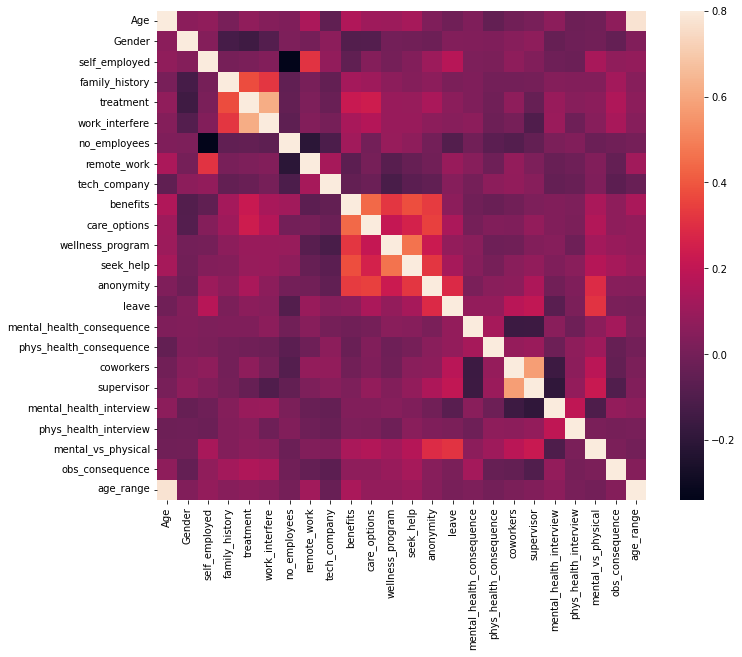

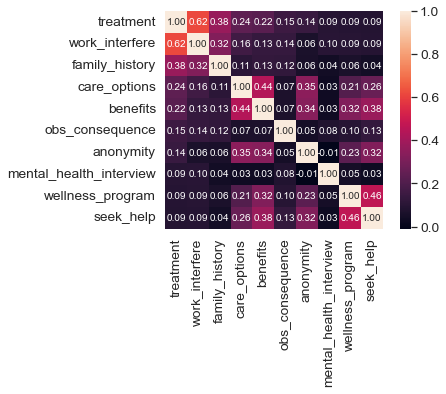

In [15]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show() # The show() function in pyplot module of matplotlib library is used to display all figures as shown in the below graph 

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index #The nlargest() method returns a specified number of rows, starting at the top after sorting the DataFrame by the highest value for a specified column.
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show() # The show() function in pyplot module of matplotlib library is used to display all figures as shown in the below graph 

# Data Visualisation

Text(0.5, 1.0, 'Total Distribuition by treated or not')

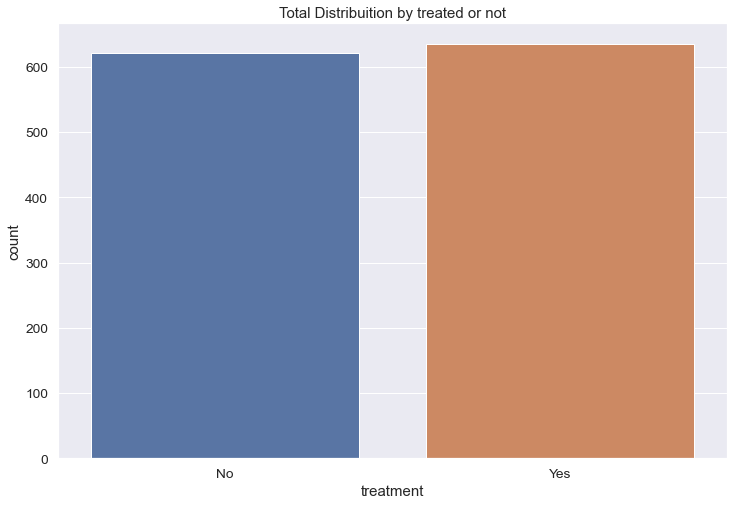

In [16]:
# Let see how many people has been treated
plt.figure(figsize=(12,8)) #figsize is a tuple of the width and height of the figure in inches,
labels = labelDict['label_treatment']
ax = sns.countplot(x="treatment", data=df)
ax.set_xticklabels(labels) #This method will mark the data points at the given positions with ticks.

plt.title('Total Distribuition by treated or not') # we have used plt.title function and labeled as 'Total Distribution by treated or not'
#It shows the highest number of people who got treated(yes)

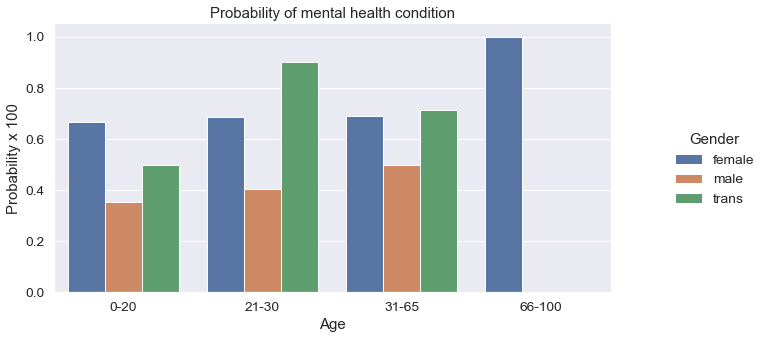

In [17]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
#The new catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables, like boxplot, stripplot and so on.
g.set_xticklabels(o) #This method will mark the data points at the given positions with ticks.

plt.title('Probability of mental health condition') #we have used plt.title function and labeled as 'Probability of mental health condition'
plt.ylabel('Probability x 100')  # Plt.ylabel function is used to label the yaxis and we labeled as ''Probability x 100'
plt.xlabel('Age')  # Plt.xlabel function is used to label the xaxis and we labeled as "Age'"
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8) #The subplots_adjust() function in pyplot module of matplotlib library is used to tune the subplot layout

plt.show()  # The show() function in pyplot module of matplotlib library is used to display all figures as shown in the below 
#We can see females who are above 65 years and transgenders who are above 21 years are prone to mental health condition.

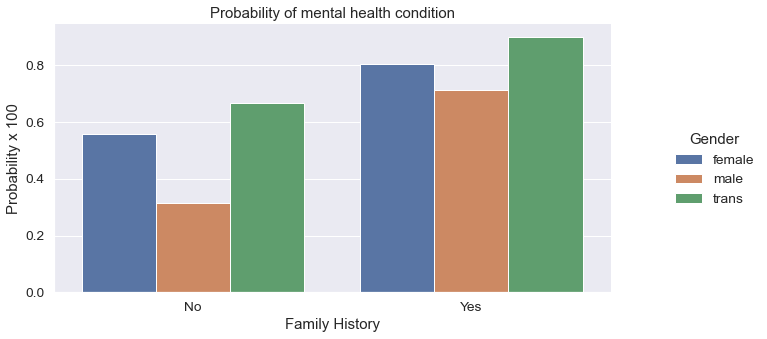

In [18]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
#The new catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables, like boxplot, stripplot and so on.
g.set_xticklabels(o)  #This method will mark the data points at the given positions with ticks.
plt.title('Probability of mental health condition') #we have used plt.title function and labeled as 'Probability of mental health condition'
plt.ylabel('Probability x 100')  # Plt.ylabel function is used to label the yaxis and we labeled as ''Probability x 100'
plt.xlabel('Family History') # Plt.xlabel function is used to label the xaxis and we labeled as 'family history'

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8) #The subplots_adjust() function in pyplot module of matplotlib library is used to tune the subplot layout

plt.show() # The show() function in pyplot module of matplotlib library is used to display all figures as shown in the below
#We can see that transgender have the highest history of mental conditions.

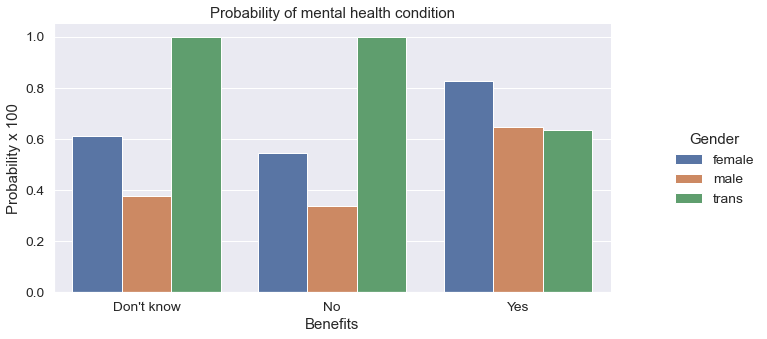

In [19]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
#The new catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables, like boxplot, stripplot and so on.
g.set_xticklabels(o)  #This method will mark the data points at the given positions with ticks.
plt.title('Probability of mental health condition') #we have used plt.title function and labeled as 'Probability of mental health condition'
plt.ylabel('Probability x 100')  # Plt.ylabel function is used to label the yaxis and we labeled as ''Probability x 100'
plt.xlabel('Benefits')   # Plt.xlabel function is used to label the xaxis and we labeled as 'benefits'

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8) #The subplots_adjust() function in pyplot module of matplotlib library is used to tune the subplot layout
plt.show()  # The show() function in pyplot module of matplotlib library is used to display all figures as shown in the below 
#We can see that females receive the highest number of benefits

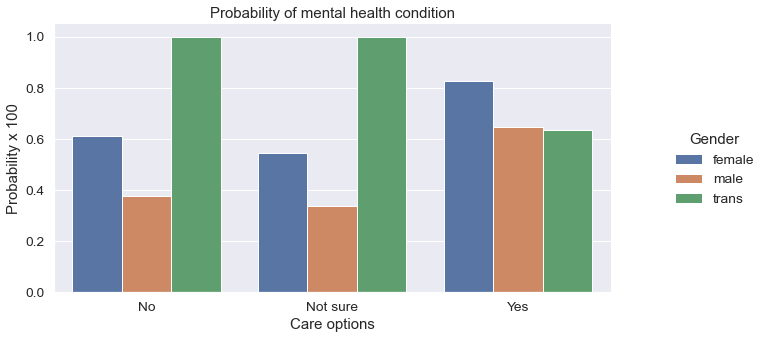

In [20]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
#The new catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables, like boxplot, stripplot and so on.
g.set_xticklabels(o)  #This method will mark the data points at the given positions with ticks.
plt.title('Probability of mental health condition') #we have used plt.title function and labeled as 'Probability of mental health condition'
plt.ylabel('Probability x 100')  # Plt.ylabel function is used to label the yaxis and we labeled as ''Probability x 100'
plt.xlabel('Care options')  # Plt.xlabel function is used to label the xaxis and we labeled as 'care options'

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8) #The subplots_adjust() function in pyplot module of matplotlib library is used to tune the subplot layout
plt.show()  # The show() function in pyplot module of matplotlib library is used to display all figures as shown in the below
#We can see from the result that the females have highest care options

# Spliltting the dataset

In [21]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df[feature_cols]
y = df.treatment
# split X and y into training and testing sets with test size 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


# Scaling and fitting

In [22]:
#scaling for all features
scaler = MinMaxScaler(feature_range=(0,1)) #The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively
rescaledX_train = scaler.fit_transform(X_train) #fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data
rescaledX_test = scaler.fit_transform(X_test)

# Modeling

# Logistic regression

In [23]:
# To Build a logistic regression 
lr_model = LogisticRegression(random_state=15) #Logistic regression aims to solve classification problems. 
# To fit the model
lr_model.fit(rescaledX_train, y_train)


LogisticRegression(random_state=15)

In [24]:
# To predict the model
lr_y_pred = lr_model.predict(rescaledX_test)

Confusion Matrix

In [25]:
#To find the confusion matrix
confusion_matrix(y_test, lr_y_pred)

array([[156,  52],
       [ 29, 178]], dtype=int64)

# Model Evaluation

In [26]:
#To find the accuracy by using accuracy_score function
lr_acc = accuracy_score(y_test, lr_y_pred) 
print("Accuracy of logistic regression classifier: ", lr_acc)
#Its an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made.
#Accuracy score is 80.48%

Accuracy of logistic regression classifier:  0.8048192771084337


In [27]:
 #To find the Precision by using precision_score function
lr_precision = precision_score(y_test, lr_y_pred)
print("Precision of logistic regression classifier: ", lr_precision)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
#Precision score is 77.39%

Precision of logistic regression classifier:  0.7739130434782608


In [28]:
# To find the recall by using recall_score function
lr_recall = recall_score(y_test, lr_y_pred) 
print("Recall of logistic regression classifier: ",lr_recall )
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# Recall score is 86%

Recall of logistic regression classifier:  0.8599033816425121


In [29]:
# To show the classification report
print(classification_report(y_test, lr_y_pred))
#A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. 

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       208
           1       0.77      0.86      0.81       207

    accuracy                           0.80       415
   macro avg       0.81      0.80      0.80       415
weighted avg       0.81      0.80      0.80       415



Interperting the output

As per the result : Precision is 0.84, FRecall is 0.75 and F1 score is 0.79
Accuracy is 0.80 and it works best if false positives and false negatives are similar. If the false positives and false negatives are very different, it’s better to look at both Precision and Recall.
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. In our case, F1 score is 0.79

# Random Forest Classifier

In [30]:
#To build the model RandomForest
rfc_model = RandomForestClassifier(random_state = 15)
# random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
#To fit the model
rfc_model.fit(rescaledX_train, y_train)

RandomForestClassifier(random_state=15)

In [31]:
#To predict the model
rfc_y_pred = rfc_model.predict(rescaledX_test)

In [32]:
#To find the confusion matrix
confusion_matrix(y_test, rfc_y_pred)

array([[157,  51],
       [ 37, 170]], dtype=int64)

# model evaluation

In [33]:
#To find the accuracy by using accuracy_score function
rfc_acc = accuracy_score(y_test, rfc_y_pred) #To find the accuracy by using accuracy_score function
print("Accuracy of random forest classifier: ",rfc_acc )
#evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made.
#Accuracy score is 78.80

Accuracy of random forest classifier:  0.7879518072289157


In [34]:
 #To find the Precision by using precision_score function
rfc_precision = precision_score(y_test, rfc_y_pred)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
print("Precision of logistic regression classifier: ", rfc_precision)
#Precision score is 76.92%

Precision of logistic regression classifier:  0.7692307692307693


In [35]:
# To find the recall by using recall_score function
rfc_recall = recall_score(y_test, rfc_y_pred) 
print("Recall of logistic regression classifier: ",rfc_recall )
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# Recall score is 82.12

Recall of logistic regression classifier:  0.821256038647343


In [36]:
# To show the classification report
print(classification_report(y_test, rfc_y_pred)) 
#A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. 

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       208
           1       0.77      0.82      0.79       207

    accuracy                           0.79       415
   macro avg       0.79      0.79      0.79       415
weighted avg       0.79      0.79      0.79       415



Interperting the output

As per the result : Precision is 0.81, FRecall is 0.75 and F1 score is 0.78
Accuracy is 0.79 and it works best if false positives and false negatives are similar. If the false positives and false negatives are very different, it’s better to look at both Precision and Recall.
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. In our case, F1 score is 0.78

# KNeightboursClassifier Model

In [37]:
#to build the KNeightboursClassifier Model
kn_model = KNeighborsClassifier()
#KNeighborsClassifier is for K nearest neighbor and it implements classification based on voting by nearest k-neighbors of target point
# To fit the model
kn_model.fit(rescaledX_train, y_train)

KNeighborsClassifier()

In [38]:
#To predict the model
kn_y_pred = kn_model.predict(rescaledX_test)

# model evaluation

In [39]:
#To find the accuracy by using accuracy_score function
accuracy_score(y_test, kn_y_pred) 
print("Accuracy of KNeighbors classifier: ", kn_model.score(rescaledX_test, y_test))
#evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made.
#Accuracy score is 77.83%

Accuracy of KNeighbors classifier:  0.7783132530120482


In [40]:
#To find the Precision by using precision_score function
rfc_precision = precision_score(y_test, kn_y_pred) 
print("Precision of logistic regression classifier: ", rfc_precision)
##The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
#Precision score is 74.46%

Precision of logistic regression classifier:  0.7446808510638298


In [41]:
# To find the recall by using recall_score function
rfc_recall = recall_score(y_test, kn_y_pred)
print("Recall of logistic regression classifier: ",rfc_recall )
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# Recall score is 84.54%

Recall of logistic regression classifier:  0.8454106280193237


In [42]:
# To show the classification report
print(classification_report(y_test, kn_y_pred))
##A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. 

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       208
           1       0.74      0.85      0.79       207

    accuracy                           0.78       415
   macro avg       0.78      0.78      0.78       415
weighted avg       0.78      0.78      0.78       415



Interperting the output

As per the result : Precision is 0.82, FRecall is 0.71 
Accuracy is 0.78 and it works best if false positives and false negatives are similar. If the false positives and false negatives are very different, it’s better to look at both Precision and Recall.
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. In our case, F1 score is 0.76

The Logistic Regression and Random Forest have the best accuracy. Lets hypertune parameters for these and check our best model for mental health treatments

# Hypertuning the model

hyperparameter tuning for RandomForestClassifier

In [43]:
# hyperparameter tuning for RandomForestClassifier
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # It is used to create an evenly spaced sequence in a specified interval.
parameters = {'n_estimators': [90, 100, 120, 150, 200], 'max_features': ["auto", "sqrt", "log2"]}
cls = GridSearchCV(estimator = rfc_model, param_grid = parameters) #It is a technique for finding the optimal parameter values from a given set of parameters in a grid. 
cls.fit(rescaledX_train, y_train)

# displaying the best params 
cls.best_params_ 

{'max_features': 'log2', 'n_estimators': 200}

In [44]:
rfc_model2 = RandomForestClassifier(random_state = 15, n_estimators = 200, max_features = 'log2')
# To fit the model
rfc_model2.fit(rescaledX_train, y_train)
# To predict the model
y_pred = rfc_model2.predict(rescaledX_test)
rfc_model2.score(rescaledX_test, y_test)
#Accuracy of RandomForestClassifier is 81.68

0.8168674698795181

hyperparameter tuning for Logistic Regression

In [45]:
#Logistic Regression
#hyperparameter tuning
solvers = ['newton-cg', 'lbfgs']
penalty = [ 'l2']
c_values = [ 0.1, 1, 10, 100]
grid_values = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=None)
cls = GridSearchCV(estimator=lr_model, param_grid=grid_values, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0) #It is a technique for finding the optimal parameter values from a given set of parameters in a grid. 

cls.fit(rescaledX_train, y_train)

# displaying the best params 
cls.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [46]:
# Build a logistic regression model
lr_model_tuned = LogisticRegression(C=1,penalty = 'l2',solver='newton-cg')
#To fit the model
lr_model_tuned.fit(rescaledX_train, y_train)
#To predict the model
y_pred = lr_model_tuned.predict(rescaledX_test)
lr_model_tuned.score(rescaledX_test,y_test)
#Accuracy of Logistic Regression is 80.48

0.8048192771084337

The best score is using the Random forest Classifier model with parameters obtained from GridSearchCV(). Hence, our final model for mental health treatments is now ready!

In [47]:
model = RandomForestClassifier(random_state = 15, n_estimators = 200, max_features = 'log2')
# To fit the model
model.fit(rescaledX_train, y_train)
# To predict the model
y_pred = rfc_model.predict(rescaledX_test)
model.score(rescaledX_test, y_test)
#Accuracy of RandomForestClassifier is 81.68%

0.8168674698795181

# Feature importance for RandomForest

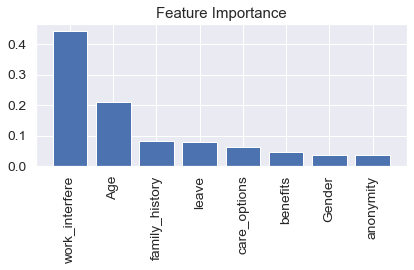

In [48]:
importances = rfc_model2.feature_importances_ 
sorted_indices = np.argsort(importances)[::-1]
#Feature Importance is a score assigned to the features of a Machine Learning model that defines how “important” is a feature to the model's prediction

 
plt.title('Feature Importance')  #we have used plt.title function and labeled as 'Feature importance'
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center') #A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout() #The tight_layout() function in pyplot module of matplotlib library is used to automatically adjust subplot parameters to give specified padding.
plt.show() # The show() function in pyplot module of matplotlib library is used to display all figures as shown in the below
#As shown in the fig., we can observe that the most significant factors that impacts mental health patients, we can see that mental health interferes with work

The RandomForest classifier Model is able to predict whether a patient to be treated for their mental illness or not with an enhanced accuracy of 80.72%

We have used three models i.e Logistic Regression,RandomForest classifier and KNeighbours classifier 
We found that the Logistic Regression and Random Forest have the best accuracy. 
We hypertuned the parameters for above models and it shows the best model with the best parameters for mental health illness predictions
The best model is Randomforest model with parameters obtained from GridSearchCV().HenceRandomforest Machine Learning Model is able to predict whether a patient to be treated for their mental illness or not with an enhanced accuracy of ~81%